In [40]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import seaborn
%matplotlib inline

In [3]:
xls_file=pd.ExcelFile('D:/RegressionByExample/ComputerRepair.xlsx')
table=xls_file.parse('Sheet1')

In [ ]:
m=pd.DataFrame(table)

In [7]:
print(m.cov())

             Minutes       Units
Minutes  2136.027473  136.000000
Units     136.000000    8.769231


In [ ]:
#Covariance between min (length of service call as reponse variable) & units (electronic components)
#covariance between minutes and units is 136

In [9]:
print(m.corr())

          Minutes     Units
Minutes  1.000000  0.993699
Units    0.993699  1.000000


In [ ]:
#0.993 indicates strong relationship between Y & X

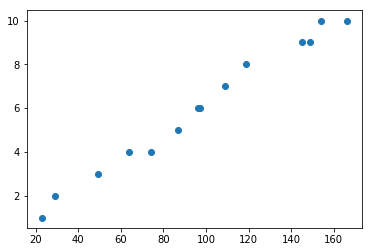

In [12]:
#plotting scatter plot between response and predictor variable
plt.scatter(m['Minutes'],m['Units'])

In [ ]:
#Plot shows linear relationship

In [13]:
#Simple linear regression model 
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Minutes ~ Units', data=m).fit()

# print the coefficients
lm.params

Intercept     4.161654
Units        15.508772
dtype: float64

In [14]:
# intercept of 4.161 implies that the setup or startup time for each repair is aprroximately 4 min
# Unit = 15.5 implies that it takes additional 15.5 min for each additional component to be repaired
#Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

# print the p-values for the model coefficients
lm.pvalues

Intercept    2.385344e-01
Units        8.916254e-13
dtype: float64

As it relates to model coefficients, here is the conventional hypothesis test:
• null hypothesis: There is no relationship between Minutes and Units (and thus $\beta_1$ equals zero)
• alternative hypothesis: There is a relationship between Minutes and Units (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero:


#since p value is less than alpha =0.05 indicates hig significance implies predictor variables units is statstically significant predictor of response variable minutes


In [15]:
# print the R-squared value for the model
lm.rsquared

0.98743719806207364

In [20]:
#summary of regression
lm.summary()

C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Thu, 03 Aug 2017   Prob (F-statistic):           8.92e-13
Time:                        11:50:30   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.239      -3.148      11.472
Units         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
m

,Minutes,Units
0,23,1
1,29,2
2,49,3
3,64,4
4,74,4
5,87,5
6,96,6
7,97,6
8,109,7
9,119,8


In [23]:
#calculating standard deviation
m.stack().std() 

56.477684407018984

In [7]:
#Multiple linear regression
xls_file=pd.ExcelFile('D:/RegressionByExample/SupervisorPerformance.xlsx')
t1=xls_file.parse('Sheet1')
m1=pd.DataFrame(t1)

In [25]:
m1.cov()

,Y,X1,X2,X3,X4,X5,X6
Y,148.171264,133.779310,63.464368,89.104598,74.688506,18.842529,19.422989
X1,133.779310,177.282759,90.951724,93.255172,92.641379,24.731034,30.765517
X2,63.464368,90.951724,149.705747,70.845977,56.671264,17.825287,43.216092
X3,89.104598,93.255172,70.845977,137.757471,78.139080,13.467816,64.197701
X4,74.688506,92.641379,56.671264,78.139080,108.102299,38.773563,61.422989
X5,18.842529,24.731034,17.825287,13.467816,38.773563,97.909195,28.845977
X6,19.422989,30.765517,43.216092,64.197701,61.422989,28.845977,105.857471


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EDC56B5EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EDC78B1A20>]], dtype=object)

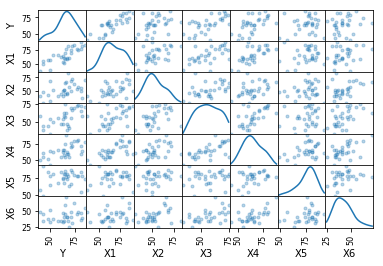

In [27]:
from pandas import scatter_matrix
scatter_matrix(m1,diagonal='kde',alpha=0.3)

In [8]:
lm1 = smf.ols(formula='Y~X1+X2+X3+X4+X5+X6', data=m1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Tue, 08 Aug 2017   Prob (F-statistic):           1.24e-05
Time:                        14:34:36   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7871     11.589      0.931      0.362     -13.187      34.761
X1             0.6132      0.161      3.809      0.001       0.280       0.946
X2            -0.0731      0.136     -0.538      0.596      -0.354       0.208
X3             0.3203      0.169      1.901      0.070      -0.028       0.669
X4             0.0817      0.221      0.369      0.715      -0.376       0.540
X5             0.0384      0.147      0.261      0.796      -0.266       0.342
X6            -0.2171      0.178     -1.218      0.236      -0.586       0.152
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.255
Skew:                          -0.081   Prob(JB):                        0.534
Kurtosis:                       2.011   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation of result (source: http://connor-johnson.com/2014/02/18/linear-regression-with-python/)
And now we have a very nice table of mostly meaningless numbers. I’ll go through and explain each one. The left column of the first table is mostly self explanatory. The degrees of freedom of the model are the number of predictor, or explanatory variables. The degrees of freedom of the residuals is the number of observations minus the degrees of freedom of the model, minus one.

Most of the values listed in the summary are available via the result object. For instance, the R2 value is obtained by result.rsquared. If you are using IPython, you may type results. and hit the TAB key, and a list of attributes for the results object will drop down.

R2
The R^{2} term is the coefficient of determination and it usually reflects how well the model fits the observed data. 

Adjusted R2
As you incorporate more predictor variables then R^{2} typically increases because you’re trying to map a much larger 
input space onto a single scalar prediction. This is known as the Curse of Dimensionality. (Dunh duh DUUUUNH!) 
The adjusted R^{2} takes into account the number of predictor variables (the degrees of freedom) and number of
observations. 

F-statistic
N.B. In the following discussion of F-tests and t-tests, please bear in mind that squinting over a p-values at \alpha significance levels is silly, because your model is built upon simplifying and inaccurate assumptions. Hypothesis testing should guide your decision making, not dictate it.

That being said, the null hypothesis of the F-test is that the data can be modeled accurately by setting the regression coefficients to zero. The alternative hypothesis is that at least one of the regression coefficients should be non-zero. If the F-distribution provides a p-value that is lower than some threshold \alpha = 0.05, 0.01, then we reject the null hypothesis, and and say that our model is, in fact, “doing something with its life.” 

Log-Likelihood

If we have several possible models, and we assume that the errors for each of the models are normally distributed about zero, then we can write the likelihood function for a single model as,


AIC and BIC

The Akaike information criterion (AIC) and the Bayesian information criterion (BIC) are based on the log-likelihood described in the previous section. Both measures introduce a penalty for model complexity, but the AIC penalizes complexity less severely than the BIC. The AIC and BIC are given by,
The AIC is a relative estimate of information loss between different models. The BIC was initially proposed using a Bayesian argument, and is not related to ideas of information. Both measures are only used when trying to decide between different models. So, if you have one regression for alcohol sales based on cigarette sales, and another model for alcohol consumption that incorporated cigarette sales and lighter sales, then you would be inclined to choose the model that had the lower AIC or BIC value.

Coefficients
The coefficients or weights of the linear regression are contained in the attribute params, and returned as a pandas Series object, since we used a pandas DataFrame as input. This is nice, because the coefficients are named for convenience.

Standard Error
we will calculate the covariance-variance matrix, also called the covariance matrix, for the estimated coefficients The standard errors are the square roots of the elements on the main diagonal of this covariance matrix. 

t-statistic
We use the t-test to test the null hypothesis that the coefficient of a given predictor variable is zero, implying that a given predictor has no appreciable effect on the response variable. The alternative hypothesis is that the predictor does contribute to the response. In testing we set some threshold, \alpha = 0.05, 0.01, and if \Pr(T \ge \vert t \vert) \textless \alpha, then we reject the null hypothesis at our threshold alpha, otherwise we fail to reject the null hypothesis. The t-test generally allows us to evaluate the importance of different predictors, assuming that the residuals of the model are normally distributed about zero. If the residuals do not behave in this manner, then that suggests that there is some non-linearity between the variables, and that their t-tests should not be used to asses the importance of individual predictors. Furthermore, it might be best to try to modify the model so that the residuals do tend the cluster normally about zero.

Confidence Interval
The confidence interval is built using the standard error, the p-value from our T-test, and a critical value from a T-test having N-P degrees of freedom, where N is the number of observations and P is the number of model parameters, i.e., the number of predictor variables. The confidence interval is the the range of values we’d expect to find the parameter of interest, based on what we’ve observed. You will note that we have a confidence interval for predictor variable coefficient, and the constant term. A smaller confidence interval suggests that we are confident about the value of the estimated coefficient, or constant term. A larger confidence interval suggests that there is more uncertainty or variance in the estimated term. Again, let me reiterate that hypothesis testing is only one perspective. Furthermore, it is a perspective that was developed in the late nineteenth and early twentieth centuries when data sets were generally smaller and more expensive to gather, and data scientists were using books of logarithm tables for arithmetic.

Skewness and Kurtosis
Skew and kurtosis refer to the shape of a (normal) distribution. Skewness is a measure of the asymmetry of a distribution, and kurtosis is a measure of its curvature, specifically how peaked the curve is.

Omnibus Test
The Omnibus test uses skewness and kurtosis to test the null hypothesis that a distribution is normal. In this case, we’re looking at the distribution of the residual. If we obtain a very small value for \Pr( \mbox{ Omnibus } ), then the residuals are not normally distributed about zero, and we should maybe look at our model more closely. The statsmodels OLS function uses the scipy.stats.normaltest() function. If you’re interested, the K2 test developed by D’Agostino, D’Agostino Jr., and Belanger 1, with a correction added by Royston 2, is presented below, which is adapted from a random Stata manual I found 3. It’s a real booger.
Thus, if either the skewness or kurtosis suggests non-normality, this test should pick it up.

Durbin-Watson
The Durbin-Watson test checks for autocorrelation by looking at he residuals separated by some lag; here the lag is one.The Durbin-Watson statistic is approximately equal to 2(1-r), where r is the sample autocorrelation. The statistic ranges from zero to four, and a value around two suggests that there is no autocorrelation. Values greater than two suggest negative correlation, and values less that one suggest positive correlation.

Jarque-Bera Test
The Jarque-Bera test is another test that considers skewness (S), and kurtosis (K). The null hypothesis is that the distribution is normal, that both the skewness and excess kurtosis equal zero, or alternatively, that the skewness is zero and the regular run-of-the-mill kurtosis is three. Unfortunately, with small samples the Jarque-Bera test is prone rejecting the null hypothesis–that the distribution is normal–when it is in fact true.

Condition Number
The condition number measures the sensitivity of a function’s output to its input. When two predictor variables are highly correlated, which is called multicolinearity, the coefficients or factors of those predictor variables can fluctuate erratically for small changes in the data, or the model. Ideally, similar models should be similar, i.e., have approximately equal coefficients. Multicolinearity can cause numerical matrix inversion to crap out, or produce inaccurate results. One approach to this problem in regression is the technique of ridge regression, which is available in the sklearn Python module.We calculate the condition number by taking the eigenvalues of the product of the predictor variables (including the constant vector of ones) and then taking the square root of the ratio of the largest eigenvalue to the least eigenvlaue. If the condition number is greater than thirty, then the regression may have multicolinearity.

#a centered variable is obtained by subtracting from each observation the mean of the observation
#Two type of scaling 
a) Unit lenth scaling post centered
z(y) = (Y - Y_bar)/(L(y))
L(y) = (Sigma (Y - Y_bar)^2)^0.5

z(j) = (X(J) - X(J)_bar/(L(j))
L(j) = (Sigma (X(IJ) - X(J)_bar)^2)^0.5

b) Standardization
Y_bar = (Y-Y_bar)/s(y)
s(y) and s(j)are standard deviation

X_bar(j) = (X(J)-(X_Bar(J))/s(j)

second type of scaling can be done using standard scaler from scikit learn

##In no intercept model Y_bar and x_Bar will be zero in above formula

#to obtain beta from standardized and scales variables is as follows
Beta (j) = (s(y)/s(j))Theta(j)
Beta_naught=Y_bar-(Sigma(Beta(j)*X_Bar(j))

The regression coefficient obtained using standardized version of variable are often refferred to as Beta coefficient. Theta(j) measures the change in standardized unit Y corresponding to an increase of one standard deviation unit in x(j)

#Properties of the least square estimates


In [5]:
#Hypothesis testing
#1. All the regression coefficient with predictor variable are zero
#H0: Reduced model is adeqaute, H1: Full model is adequate
#RM: H0: Y = Beta0 (This also implies Beta1=Beta2=BetaP=0)
#FM: H0: Y = Beta0 + Beta1*X(1) + ..... + BetaP*X(p)

#FM
lm1 = smf.ols(formula='Y~X1+X2+X3+X4+X5+X6', data=m1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           1.24e-05
Time:                        11:58:41   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7871     11.589      0.931      0.362     -13.187      34.761
X1             0.6132      0.161      3.809      0.001       0.280       0.946
X2            -0.0731      0.136     -0.538      0.596      -0.354       0.208
X3             0.3203      0.169      1.901      0.070      -0.028       0.669
X4             0.0817      0.221      0.369      0.715      -0.376       0.540
X5             0.0384      0.147      0.261      0.796      -0.266       0.342
X6            -0.2171      0.178     -1.218      0.236      -0.586       0.152
==============================================================================
Omnibus:                        2.386   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.255
Skew:                          -0.081   Prob(JB):                        0.534
Kurtosis:                       2.011   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#It should be noted that the constant in the above model is statistically not significant (p value 0.362).In any 
# regression model unless there is a strong theretical reason, a constant should always be included even if it is
#statistically not significant
#Corresponding p value (for CL =95%, alpha=0.05) indicates only variable X1 & X3 
#anova for sum of sqaured error
aov_table = anova_lm(lm1)
print(aov_table)

            df       sum_sq      mean_sq          F        PR(>F)
X1         1.0  2927.584253  2927.584253  58.602627  9.055953e-08
X2         1.0     7.518562     7.518562   0.150502  7.016233e-01
X3         1.0   137.247472   137.247472   2.747338  1.109956e-01
X4         1.0     0.942175     0.942175   0.018860  8.919640e-01
X5         1.0     0.563837     0.563837   0.011287  9.163146e-01
X6         1.0    74.110044    74.110044   1.483490  2.355770e-01
Residual  23.0  1149.000325    49.956536        NaN           NaN


C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [49]:
j=pd.DataFrame(aov_table)
SST=j.sum()
SST
#f = [(R^2(p)-R^2(q))/(p-q)]/[(1-R^2(p))/(n-p-1)]
# for this model as apart from intercept all the variables are zero hence R^2 = 0 & q=0
#Calculating f value from scratch
F=((0.733)/6)/((1-0.733)/(30-6-1))
F
#F value is same as extracted from the lm1 summary

10.523720349563044

In [47]:
#Finding F Value from table
F_val=scipy.stats.f.ppf(q=1-0.01, dfn=6, dfd=23) # q is confidence level
F_val

3.7102183612777657

#observed F value (10.5) is larger than F_val (3.71)from table hence null hypothesis is rejected 

A more puzzling case can, however, arise when none of the t-values for testing the regression coefficients are significant, but the F-test is significant. This implies that although none of the variables individually have significant explanotary power, the entire set of variables individually have significant explanotary power, the entire set of variables taken collectively explain a significant part of variation in the dependent variable. This situation when occurs, should be looked at very carefully, for it may indicate a problem with data analyzed, namely that some of the explanatory variables may be highly correlated, a situation commonly called as collinerity

In [50]:
#Testing a subset of regression coefficient equal to zero
# as from p value only x1 and x3 are significant
#H0: beta2=beta4=beta5=beta6=0 (it implies that beta1 and beta3 are not zero)
#H1: FM
#RM: Y=beta0+beta1*X1+beta3*X3
#Calculating RM
lm2 = smf.ols(formula='Y~X1+X3', data=m1).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     32.74
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           6.06e-08
Time:                        15:21:57   Log-Likelihood:                -98.569
No. Observations:                  30   AIC:                             203.1
Df Residuals:                      27   BIC:                             207.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8709      7.061      1.398      0.174      -4.618      24.359
X1             0.6435      0.118      5.432      0.000       0.400       0.887
X3             0.2112      0.134      1.571      0.128      -0.065       0.487
==============================================================================
Omnibus:                        6.448   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                1.959
Skew:                          -0.041   Prob(JB):                        0.375
Kurtosis:                       1.751   Cond. No.                         503.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
aov_table1 = anova_lm(lm2)
print(aov_table1)

            df       sum_sq      mean_sq          F        PR(>F)
X1         1.0  2927.584253  2927.584253  63.001506  1.564999e-08
X3         1.0   114.733443   114.733443   2.469060  1.277539e-01
Residual  27.0  1254.648971    46.468480        NaN           NaN


C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Here SSE(RM)=1254.64
# From lm1 summary SSE(FM)=1149
# p = 6 (No of variable in FM) ; q = 2 (number of var in RM)
f = [(R^2(p)-R^2(q))/(p-q)]/[(1-R^2(p))/(n-p-1)]

In [53]:
f = ((1254.64-1149)/(6-2))/(1149/(30-6-1))
f

0.528659704090514

In [54]:
F_val1=scipy.stats.f.ppf(q=1-0.05, dfn=4, dfd=23) # q is confidence level
F_val1

2.7955387373613871

Since f < F_val1 this implies we fail to reject null hypothesis this implies variables X1 and X3 together explain the variation in Y as adequately as the full set of variable. We conclude that the deletion of X2,X4,X5,X6 does not adversely affect the explanotary power of model

Similarly we can test for : 
a) testing the equality of regression coefficients Beta1=Beta3 
H0: RM Y =Beta0+Beta1X1+Beta3X3 
         =Beta0+Beta(dash)(X1+X3) 
H1: FM 
b) Estimating and testing of regression parameters under constraints Lets consider Beta1+Beta3=1 
H0: RM Y = Beta0+Beta1X1+ Beta2X3 
         = Beta0+Beta1X1+(1-Beta1)X3 {Using Beta3=1-Beta1} 
         = Beta0+Beta1(X1-X3)+epsilon 
H1: FM

1)An outlier is a point that falls far from other data points. If the parameter estimates changes a great deal whn point is removed from calculation it is said to be influential i.e. if the removal of the point leads to drastic change in regression line then it is said to be influential. 
2)Points with extreme values of X are said to be high leverage (extreme values are drastically away from mean). High leverage point have greater ability to move the line. If these points fall outside teh overall pattern they can be influential
a) If an x-value that seems to be outlier lies closer to mean of x, then it seems to has low leverage and some influence(as we are asuming that removal of this point does not drastically impact regression line)
b)If an x-value that seems to be outlier lies far from mean of x (extreme value)and removal of this point leads to drastically impact regression line then this point is of high leverage and high influence

In case of high influential point, check if observation is recorded correctly, if not check if conclusion change drastically on removal of point (if not then its okay), if yes then we can either keep both conclusions or keep only conclusion where an existing relationship holds

(for multiple regression) Levarage: (1\n) + {(x(i)-X_bar)^2/(Sigma(x(i)-X_bar)^2))}

We can see that if value of x falls from from mean of x then that has high leverage

For influence we can check cooks distance

Residual plot
----------------
Error terms are :
a) Normally distributed
b) Homoscedastic (same variance at every X)
c) Independent of each other

-Plot Residual against predictors , it should be random
-Variance of residual should not increase or decrease with values of X
-There should be no curvature in residual plot
-Quantile plot of residual should be as straight line


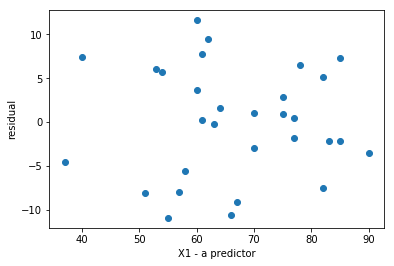

In [22]:
#Plotting residual plot (for simple linear regression)
plt.scatter(m1['X1'],lm1.resid)
plt.xlabel("X1 - a predictor")
plt.ylabel("residual")
plt.show()

Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix.The influence of each point can be visualized by the criterion keyword argument. Options are Cook's distance and DFFITS, two measures of influence.

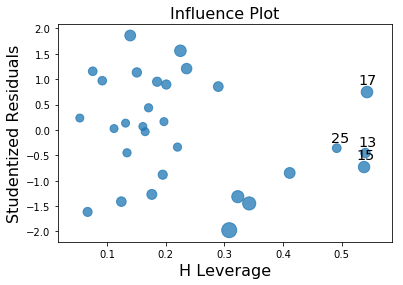

In [28]:
# leverage plot
fig5=sm.graphics.influence_plot(lm1,size=15,criterion="cooks")

#Interpretation: (Source: http://data.library.virginia.edu/diagnostic-plots/)
This plot helps us to find influential cases (i.e., subjects) if any. Not all outliers are influential in linear regression analysis (whatever outliers mean). Even though data have extreme values, they might not be influential to determine a regression line. That means, the results wouldn’t be much different if we either include or exclude them from analysis. They follow the trend in the majority of cases and they don’t really matter; they are not influential. On the other hand, some cases could be very influential even if they look to be within a reasonable range of the values. They could be extreme cases against a regression line and can alter the results if we exclude them from analysis. Another way to put it is that they don’t get along with the trend in the majority of the cases.
Unlike the other plots, this time patterns are not relevant. 

We watch out for outlying values at the upper right corner or at the lower right corner. Those spots are the places where cases can be influential against a regression line. Look for cases outside of a dashed line, Cook’s distance. When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), the cases are influential to the regression results. The regression results will be altered if we exclude those cases.

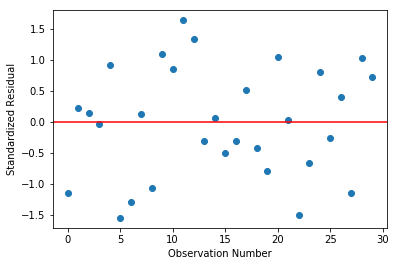

In [21]:
# simple plot of residuals
stdres=pd.DataFrame(lm1.resid_pearson)
fig2 = plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
print (fig2)

#below graph shows residual are random

Partial Regression Plots

Since we are doing multivariate regressions, we cannot just look at individual bivariate plots to discern relationships.
Instead, we want to look at the relationship of the dependent variable and independent variables conditional on the other
independent variables. We can do this through using partial regression plots, otherwise known as added variable plots.

In a partial regression plot, to discern the relationship between the response variable and the k
-th variabe, we compute
the residuals by regressing the response variable versus the independent variables excluding Xk. We can denote this by
X∼k. We then compute the residuals by regressing Xk on X∼k

. The partial regression plot is the plot
of the former versus the latter residuals.

The notable points of this plot are that the fitted line has slope βk
and intercept zero. The residuals of this plot
are the same as those of the least squares fit of the original model with full X. You can discern the effects of the
individual data values on the estimation of a coefficient easily. If obs_labels is True, then these points are annotated
with their observation label. You can also see the violation of underlying assumptions such as homooskedasticity and
linearity.

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("prestige", "income", ["income", "education"], data=prestige, ax=ax)

(Source: http://davegiles.blogspot.in/2015/02/three-different-types-of-regression.html)
#Types of residuals
a)Standardized Residuals: As you'll probably guess, "Standardized Residuals" are obtained by transforming each of the residuals as follows:

                        zi = (ei - e*) / s.e.(ei)  ;   i = 1, 2, 3, ....., n  

where s.e.(ei) is the standard error of ei; and e* is the arithmetic mean of the ei's. The latter will be zero if the model, (1) includes an intercept as a regressor.

One drawback of the standardized residuals is that the numerator and denominator in the formula for zi are not independent. So, the zi's don't follow a Student-t distribution - which you may have thought they would. However, this issue can be dealt with by considering a slightly more subtle standardization of the ei's.

b)  Studentized Residuals
These residuals are obtained by going one step further than standardizing the ei's. We use a different variance estimator for each residual - one that is independent of (ei - e*).
Specifically, model (1) is re-estimated, n times. Each time, we omit one of the observations in the sample for the y and X data. This will yield n different estimators of β, namely b(i); i = 1, 2, ...., n. (Let e(i) denote the residual vector for the ith such regression - that is, e(i) = y(i) - X(i)b(i), where y(i) and X(i) are the y vector with the ith element omitted, and the X matrix with the ith row omitted, respectively. Then, in each case, a separate estimator of σ2 is obtained by using

                     s(i)2 = e(i)'e(i) / (n - k -1)    ;     i = 1, 2, ..., n.

The "Studentized Residuals" are constructed as:

                    ui = (ei - e*) / [s(i)(1 - hii)½]    ;     i  = 1, 2, 3, ....., n.

Again, e* will be zero if the model includes an intercept.

It's important to keep in mind that neither the standardized, nor the Studentized, residuals are  pair-wise independent.

The "regular", standardized, and Studentized residuals are all used in various ways to assist in checking the specification of the associated regression model, and the robustness of the results.

c)Partial Residuals:  
Finally, there's a form of residuals that doesn't seem to get much attention in econometrics. Larsen and McCleary (1972) suggested that, in addition to using standardized or Studentized residuals for diagnostic checking, we might also consider what they termed "partial residuals".

These residuals come into play when we have a multiple regression model. To construct them, we estimate the full regression model, (1), and get the OLS estimator, b, for the full coefficient vector. The pth element of the partial residual vector associated with the pth regressor is then defined as:

              v(p)i = yi - Σ(bjXij)       ;  i = 1, 2,..., n   ;          (6)

where bj is the jth element of b; Xij is the ith observation on the jth regressor; and the range of summation in (6) is for j = 1 to k, and j ≠ p. A different partial residuals series will be obtained for each regressor in the model.

Larsen and McCleary argue that the partial residuals are useful in isolating the individual roles of the separate regressors when it comes to detecting the both the direction and extent of any non-linearities, etc. They can also be used as a useful supplement to the regular, standardized, or studentized residuals to check for possible forms of heteroskcedasticity in the model's errors.

Keep in mind that many of the tests (e.g., White's test) that we use to check for homoskedasticity are "non-constructive". A rejection of the null hypothesis doesn't tell us anything about the possible form of heteroskedasticity. So, residuals plots can be very helpful guides, perhaps pointing us to potentially useful data transformations; or to the formulation of an appropriate error variance structure, and hence likelihood function.

In [29]:
#Graph before fitting a model
xls_file=pd.ExcelFile('D:/RegressionByExample/HamiltonData.xlsx')
table=xls_file.parse('Sheet1')

In [30]:
m2=pd.DataFrame(table)

In [31]:
lm2 = smf.ols(formula='Y~X1+X2', data=m2).fit()
lm2.summary()

C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.922e+04
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           1.28e-23
Time:                        09:26:47   Log-Likelihood:                 48.430
No. Observations:                  15   AIC:                            -90.86
Df Residuals:                      12   BIC:                            -88.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5154      0.061    -73.851      0.000      -4.649      -4.382
X1             3.0970      0.012    252.314      0.000       3.070       3.124
X2             1.0319      0.004    280.079      0.000       1.024       1.040
==============================================================================
Omnibus:                        4.611   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                1.383
Skew:                           0.140   Prob(JB):                        0.501
Kurtosis:                       1.539   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
lm2 = smf.ols(formula='Y~X1', data=m2).fit()
lm2.summary()

C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                 8.112e-05
Date:                Wed, 09 Aug 2017   Prob (F-statistic):              0.993
Time:                        09:29:34   Log-Likelihood:                -17.460
No. Observations:                  15   AIC:                             38.92
Df Residuals:                      13   BIC:                             40.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9888      1.267      9.463      0.000       9.252      14.726
X1             0.0037      0.416      0.009      0.993      -0.895       0.903
==============================================================================
Omnibus:                        3.596   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                1.244
Skew:                          -0.131   Prob(JB):                        0.537
Kurtosis:                       1.614   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
lm2 = smf.ols(formula='Y~X2', data=m2).fit()
lm2.summary()

C:\Users\nisha\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     3.018
Date:                Wed, 09 Aug 2017   Prob (F-statistic):              0.106
Time:                        09:29:40   Log-Likelihood:                -15.894
No. Observations:                  15   AIC:                             35.79
Df Residuals:                      13   BIC:                             37.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6319      0.811     13.111      0.000       8.880      12.384
X2             0.1955      0.113      1.737      0.106      -0.048       0.439
==============================================================================
Omnibus:                        3.915   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                1.265
Skew:                          -0.070   Prob(JB):                        0.531
Kurtosis:                       1.584   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#The above output shows that Y is related to neither X1 nor X2 but together they predict Y almost perfectly
#Scatter plot matrix, predictor should be linearly independent of each other
print(m2.corr())
#This shows that the correlation coeffcient between X1 and X2 ~ 0.9 which is very high and as predictors should not be linearly 
#dependent, this raises a question mark. 
#Please note the pairwise scatter plot will fail to detect such multivariate relationship

           Y        X1        X2
Y   1.000000  0.002498  0.434069
X1  0.002498  1.000000 -0.899776
X2  0.434069 -0.899776  1.000000


In [ ]:
#Graph after fitting a model
#a) # simple plot of residuals given above (index plot): under the assumption of independent error the point should 
#be scattered randomly within horizontal band around zero. It is not necessary if the order in which the observation is
# taken is immaterial
#b)QQPlot should be linear


In [ ]:
SAME AS ABOVE, NOT DELETED ON PURPOSE

Since f < F_val1 this implies we fail to reject null hypothesis this implies variables X1 and X3 together explain the variation in Y as adequately as the full set of variable. We conclude that the deletion of X2,X4,X5,X6 does not adversely affect the explanotary power of model

Similarly we can test for :
a) testing the equality of regression coefficients
Beta1=Beta3
H0: RM Y =Beta0+Beta1*X1+Beta3*X3
         =Beta0+Beta(dash)(X1+X3)
H1: FM
b) Estimating and testing of regression parameters under constraints
Lets consider Beta1+Beta3=1
H0: RM Y = Beta0+Beta1*X1+ Beta2*X3
         = Beta0+Beta1*X1+(1-Beta1)*X3  {Using Beta3=1-Beta1}
         = Beta0+Beta1(X1-X3)+epsilon
H1: FM

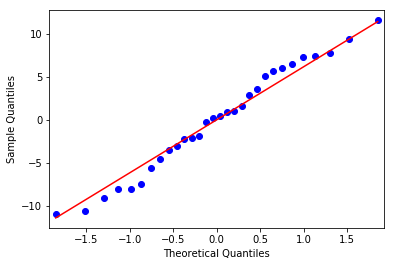

In [23]:
#for QQ PLot
res = lm1.resid 
fig = sm.qqplot(res, line='s')
plt.show() 

In [48]:
seaborn.residplot(m2['X1'],m2['X2'], m2['Y'], data=m2, lowess=False, x_partial=None, y_partial=None, order=1, robust=False, dropna=True, label=None, color=None, scatter_kws=None, line_kws=None, ax=None)

TypeError: residplot() got multiple values for argument 'data'

In [49]:
#Qualitative variables as predictors
#in salary survey data, X is experience in years, E is education (1 for HS, 2 for BS, 3 for advance degree) and Management M)
#Lets create indicator varible for E , it wll be E1 =1 implies HS if not E1=0 ,  E2 =1 implies BS if not E2=0, E1=E2=0 implies advanced degree
#The category that is not represented by an indicator variable is referred to as base category or control group and regression coefficient
#...of indicator variables are interpreted relative to control group. 
#Similarly there is only one indicator variable required to distinguish two management category
xls_file=pd.ExcelFile('D:/RegressionByExample/SalarySurveyData.xlsx')
table=xls_file.parse('Sheet1')
m3=pd.DataFrame(table)

In [101]:
#Creating indicator variable
df_n = pd.get_dummies(m3['E'],prefix='E')

In [102]:
#Drop unnecessary E_3
dm=df_n.drop('E_3',axis=1)

In [107]:
#Joining it with original dataframe
df_dummy=m3.join(dm)

In [115]:
#creating indicator variable for male
d_M=pd.get_dummies(m3['M'],prefix='M')
dm=d_M.drop('M_0',axis=1)

In [121]:
df_dummy1=df_dummy.join(dm)
k_1=df_dummy1.drop('Dict',axis=1)
k_2=k_1.drop('m',axis=1)

In [122]:
lm3 = smf.ols(formula='S~X+E_1+E_2+M_1', data=k_2).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           2.23e-27
Time:                        13:12:38   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.103e+04    383.217     28.787      0.000    1.03e+04    1.18e+04
X            546.1840     30.519     17.896      0.000     484.549     607.819
E_1        -2996.2103    411.753     -7.277      0.000   -3827.762   -2164.659
E_2          147.8249    387.659      0.381      0.705    -635.069     930.719
M_1         6883.5310    313.919     21.928      0.000    6249.559    7517.503
==============================================================================
Omnibus:                        2.293   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.362
Skew:                          -0.077   Prob(JB):                        0.506
Kurtosis:                       2.171   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

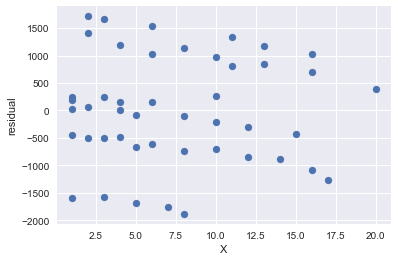

In [126]:
#Let plot residual plot vs X (Experience)
plt.scatter(m3['X'],lm3.resid)
plt.xlabel("X")
plt.ylabel("residual")
plt.show()

In [139]:
k_2['E_1M_1']=k_2['E_1']*k_2['M_1']
k_2['E_2M_1']=k_2['E_2']*k_2['M_1']

In [142]:
k_3=k_2.drop('E_1.M_1',axis=1)
k_4=k_3.drop('E_2.M_1',axis=1)

In [143]:
#Multiplicative model
lm4 = smf.ols(formula='S~X+E_1+E_2+M_1+E_1M_1+E_2M_1', data=k_2).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5517.
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           1.67e-55
Time:                        14:45:34   Log-Likelihood:                -298.74
No. Observations:                  46   AIC:                             611.5
Df Residuals:                      39   BIC:                             624.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.12e+04     79.065    141.698      0.000     1.1e+04    1.14e+04
X            496.9870      5.566     89.283      0.000     485.728     508.246
E_1        -1730.7483    105.334    -16.431      0.000   -1943.806   -1517.690
E_2         -349.0777     97.568     -3.578      0.001    -546.427    -151.728
M_1         7047.4120    102.589     68.695      0.000    6839.906    7254.918
E_1M_1     -3066.0351    149.330    -20.532      0.000   -3368.084   -2763.986
E_2M_1      1836.4879    131.167     14.001      0.000    1571.177    2101.799
==============================================================================
Omnibus:                       74.761   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1037.873
Skew:                          -4.103   Prob(JB):                    4.25e-226
Kurtosis:                      24.776   Cond. No.                         83.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

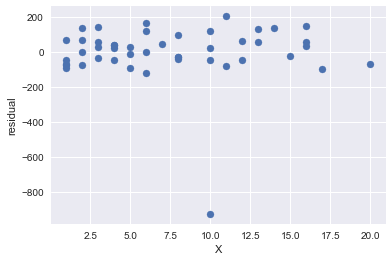

In [144]:
#Let plot residual plot vs X (Experience)
plt.scatter(k_2['X'],lm4.resid)
plt.xlabel("X")
plt.ylabel("residual")
plt.show()

In the above graph we can see x=10 there is an outlier, when we observe X=10 in the data we can find four observation related to it, in that the last observation, (observation no 33) the salary is the highest hence it can be possible that observation no 33 is outlier, removing the outlier and rerun the model we can see that the standard deviation has reduced to 67% and R2 has also increased, hence we can see that the mulltiplicative model explains correctly .
We can plot residual vs category and we can check that these groups has residual distributed around 0